In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import sklearn.preprocessing
import sklearn.impute
import sklearn.pipeline
import sklearn.svm
import sklearn.model_selection
import sklearn.tree
import sklearn.ensemble

In [2]:
train_data = pd.read_csv('D:\python_practise_deeplearning\Kaggle_competition_housing\\train.csv')
test_data = pd.read_csv('D:\python_practise_deeplearning\Kaggle_competition_housing\\test.csv')

In [8]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
def remove_columns(dataframe, dataframe_test):
    columns = dataframe.columns
    
    for i in columns:
        if dataframe[i].count()<(0.5*1460):
            dataframe = dataframe.drop(i, axis = 1)
            dataframe_test = dataframe_test.drop(i, axis = 1)
    return dataframe, dataframe_test

        

In [4]:
train_data_mod1, test_data = remove_columns(train_data, test_data)
#train_data_mod1.info()

#test_data = remove_columns(test_data)

In [5]:
def simple_impute(dataset, dataset_test, metric):
    imputer = sklearn.impute.SimpleImputer(strategy = metric)
    col = dataset.columns
    
    #print(col)
    for i in col:
        #print(i)
        if dataset[i].dtype != 'object' and i != 'SalePrice':
            #print('check')
            #print(i)
            temp = (np.array(dataset[i])).reshape(-1,1)
            #print(temp.shape)
            imputer.fit(temp)
            dataset[i] = imputer.transform(temp)
            temp = (np.array(dataset_test[i])).reshape(-1,1)
            dataset_test[i] = imputer.transform(temp)
            
    return dataset, dataset_test
        

In [6]:
def object_data_splitter(dataset, dataset_test):
    ordinal_encoder = sklearn.preprocessing.OrdinalEncoder()
    columns = dataset.columns
    dataset_object = pd.DataFrame()
    for col in columns:
        if dataset[col].dtype == object:
#             dataset_object[col] = dataset[col]
#             dataset = dataset.drop(col, axis = 1)
            #print(dataset_object.columns)
            #print(dataset_object[col].count())
            temp = dataset[col].mode()
            temp = temp.to_numpy()
            temp = temp[0]
            dataset[col] = dataset[col].fillna(temp)
            dataset_test[col] = dataset_test[col].fillna(temp) 
            ordinal_encoder.fit(np.array(dataset[col]).reshape(-1,1))
            dataset[col] = ordinal_encoder.transform(np.array(dataset[col]).reshape(-1,1))
            dataset_test[col] = ordinal_encoder.transform(np.array(dataset_test[col]).reshape(-1,1))
    dataset, dataset_test = simple_impute(dataset,dataset_test, metric = 'mean')
    #dataset_object = simple_impute(dataset_object, metric = 'mode')
    
    return dataset, dataset_test

In [7]:
train_data_mode3, test_data = object_data_splitter(train_data_mod1, test_data)
#test_data, test_data_object = object_data_splitter(test_data)

In [8]:
train_Y = train_data_mode3['SalePrice']
train_X = train_data_mode3.drop(['SalePrice'], axis = 1)
#train_X = pd.concat([train_data_mod4, train_data_object], axis = 1)

# test_Y = test_data['SalePrice']
# test_data = test_data.drop(['SalePrice'], axis = 1)
# test_X = pd.concat([test_data, test_data_object], axis = 1)

In [140]:
train_X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,2.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0


In [141]:
corr_matrix = train_X.corrwith(train_Y)

In [142]:
idx = corr_matrix.index
j = 0
for i in corr_matrix:
    print(str(idx[j])+": "+ str(i))
    j+=1

Id: -0.02191671944343111
MSSubClass: -0.08428413512659526
LotFrontage: 0.33490085154055105
LotArea: 0.26384335387140573
OverallQual: 0.7909816005838048
OverallCond: -0.077855894048678
YearBuilt: 0.5228973328794969
YearRemodAdd: 0.5071009671113864
MasVnrArea: 0.4752413167736682
BsmtFinSF1: 0.38641980624215316
BsmtFinSF2: -0.011378121450215136
BsmtUnfSF: 0.21447910554696895
TotalBsmtSF: 0.6135805515591956
1stFlrSF: 0.6058521846919147
2ndFlrSF: 0.3193338028320677
LowQualFinSF: -0.02560613000067959
GrLivArea: 0.7086244776126522
BsmtFullBath: 0.22712223313149404
BsmtHalfBath: -0.01684415429735902
FullBath: 0.5606637627484456
HalfBath: 0.2841076755947829
BedroomAbvGr: 0.16821315430073996
KitchenAbvGr: -0.1359073708421411
TotRmsAbvGrd: 0.5337231555820284
Fireplaces: 0.46692883675152763
GarageYrBlt: 0.4701774537404798
GarageCars: 0.6404091972583531
GarageArea: 0.6234314389183617
WoodDeckSF: 0.3244134445681295
OpenPorchSF: 0.31585622711605543
EnclosedPorch: -0.1285779579259565
3SsnPorch: 0.0445

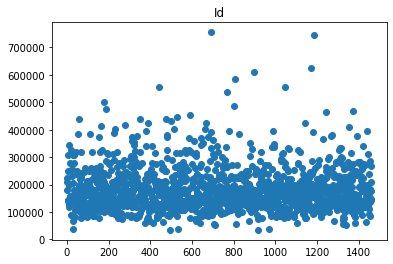

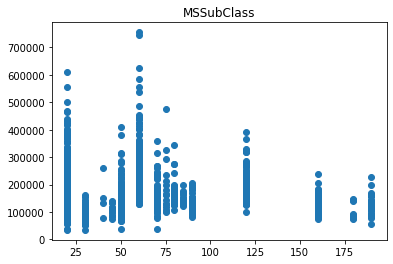

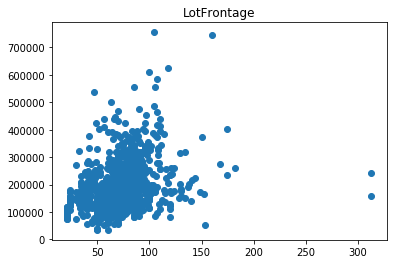

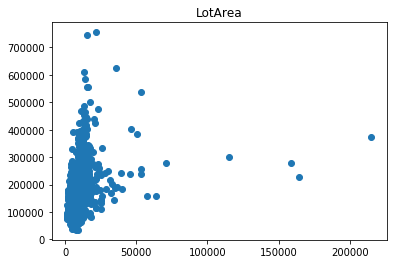

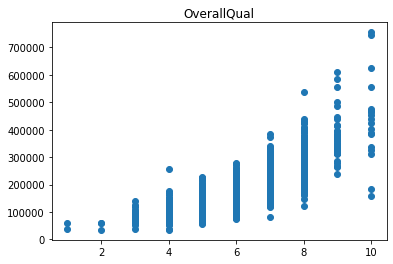

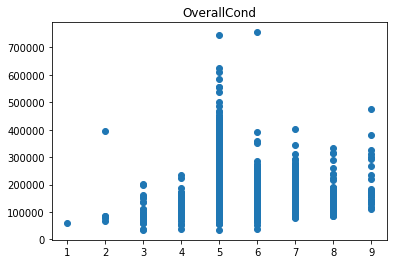

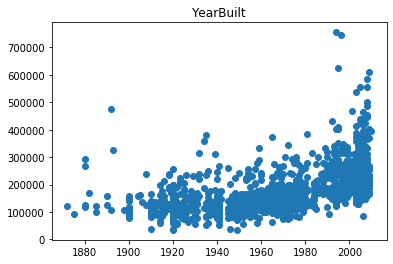

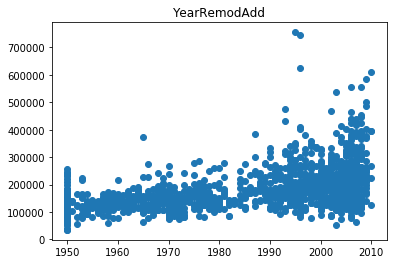

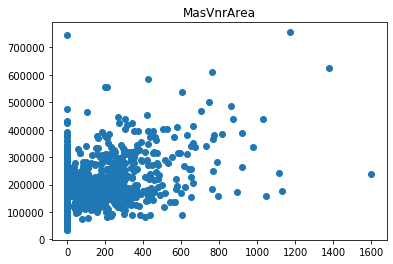

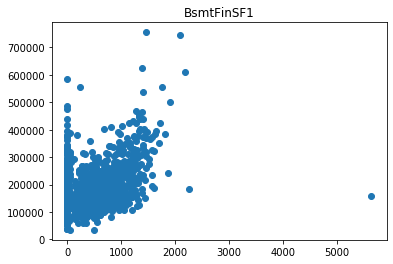

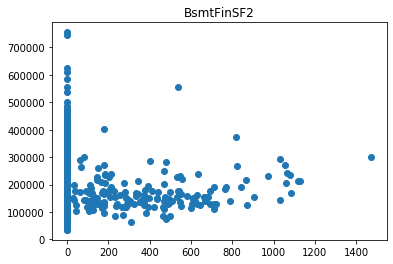

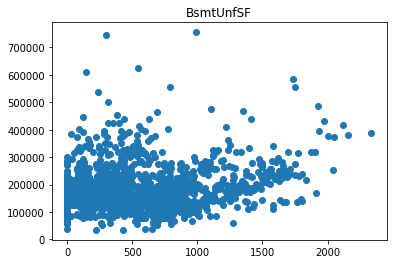

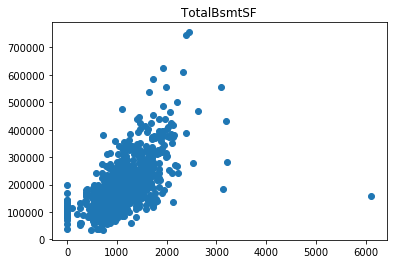

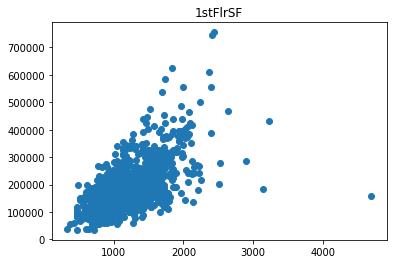

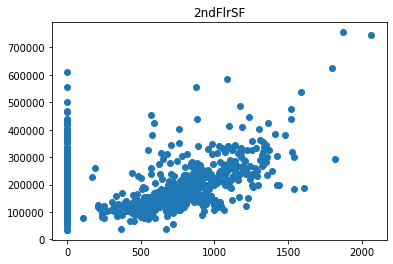

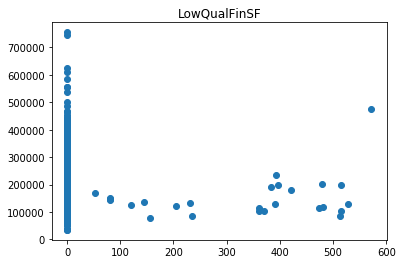

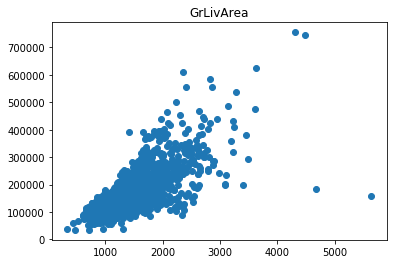

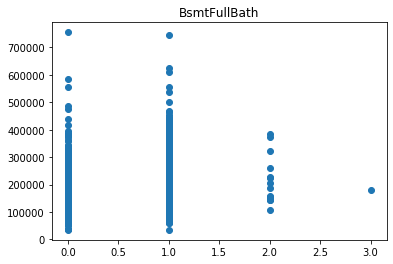

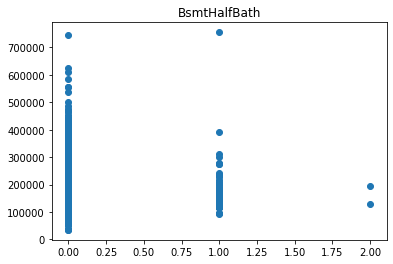

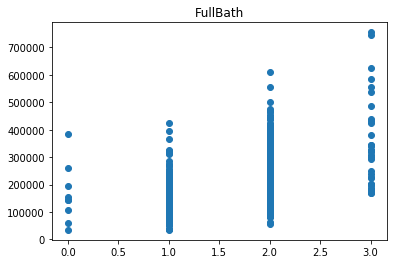

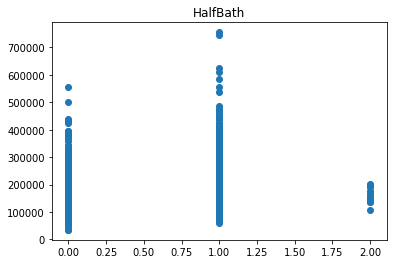

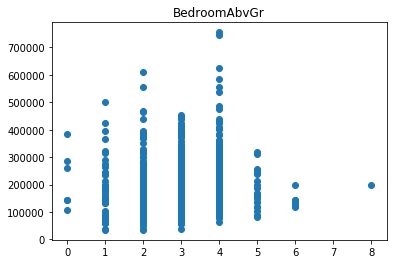

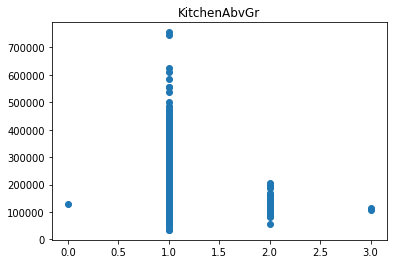

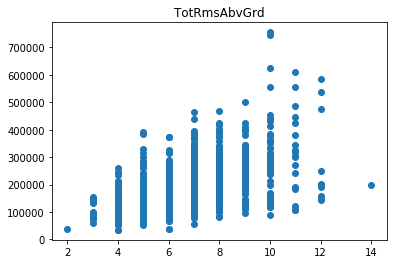

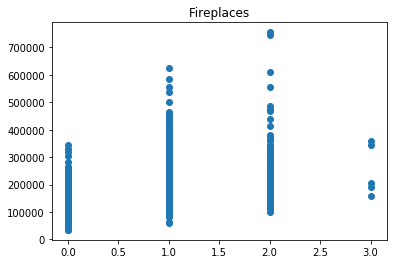

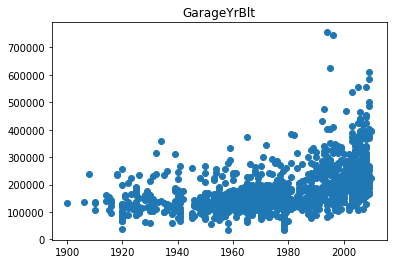

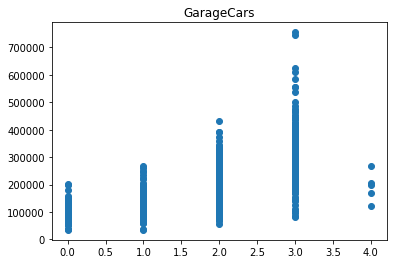

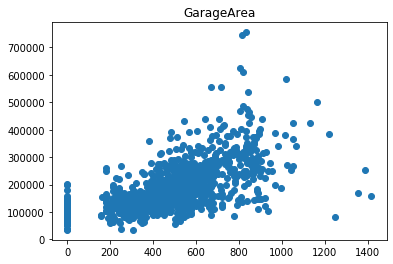

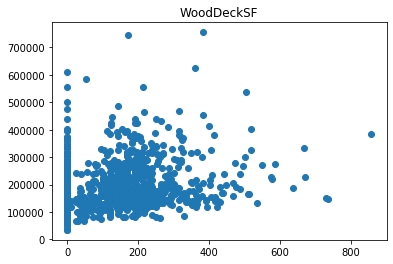

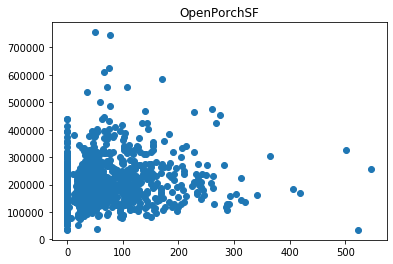

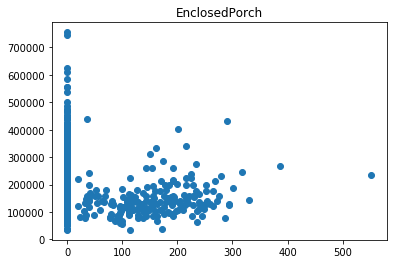

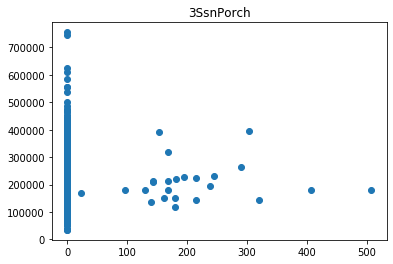

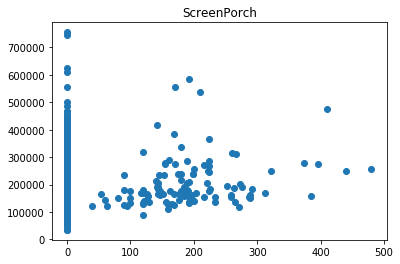

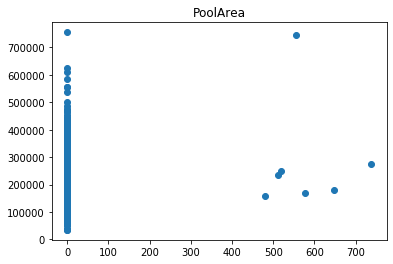

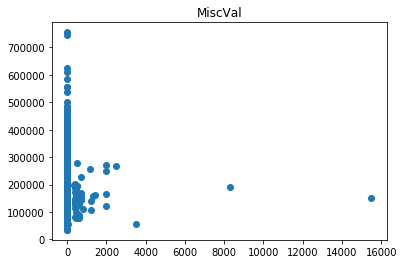

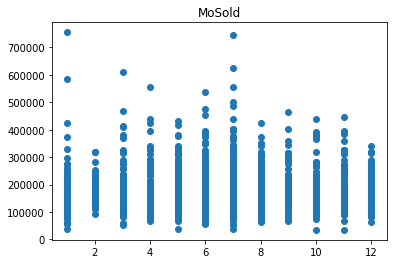

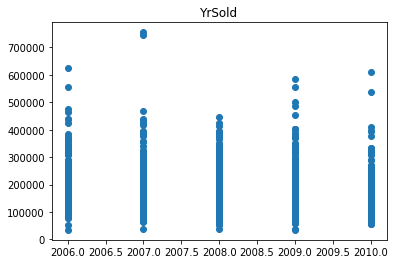

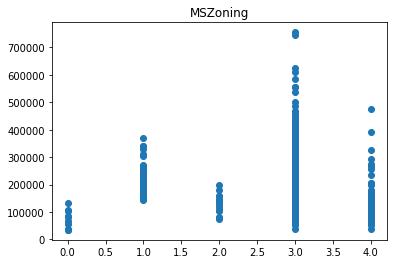

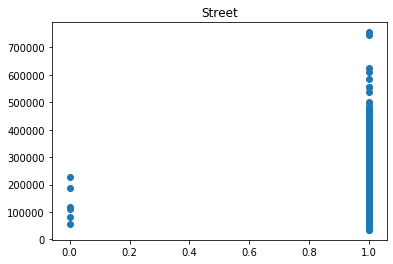

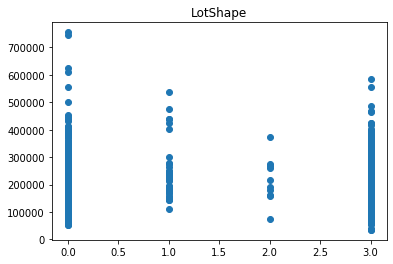

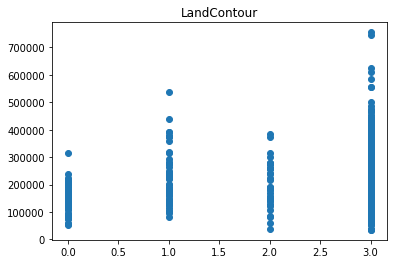

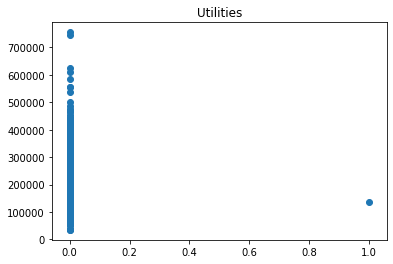

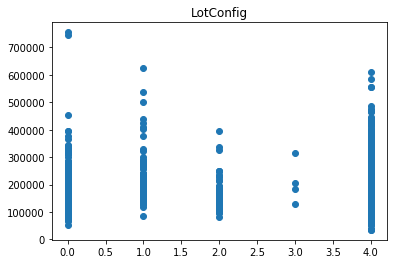

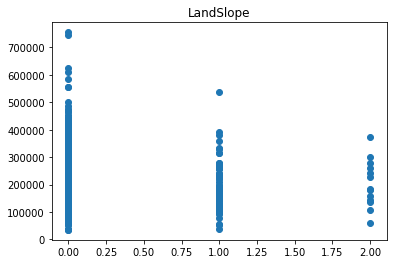

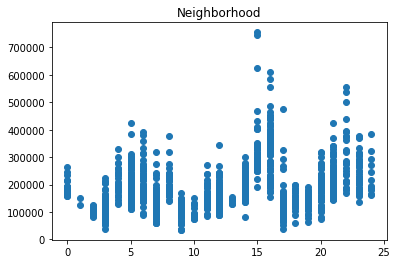

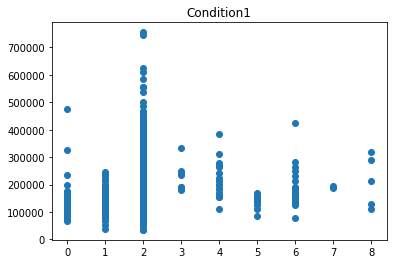

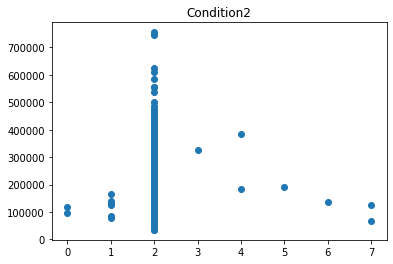

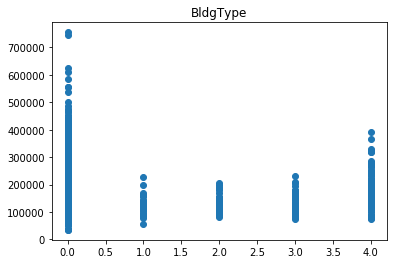

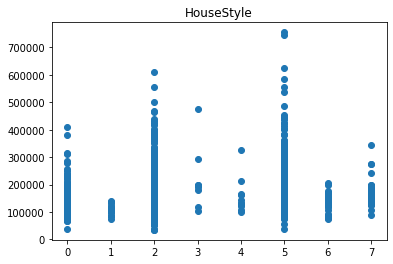

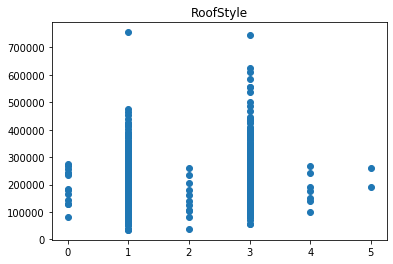

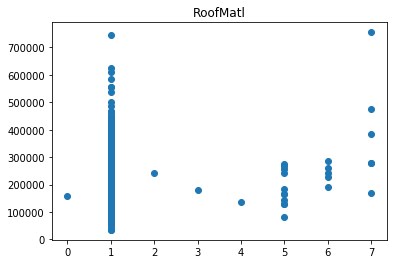

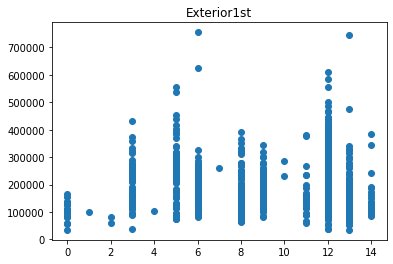

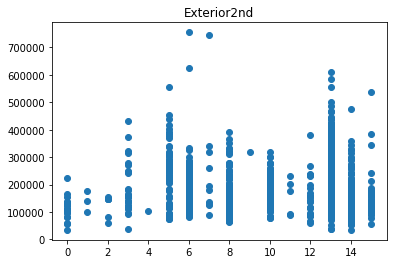

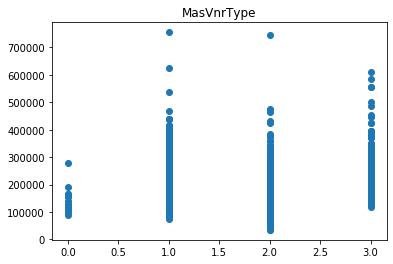

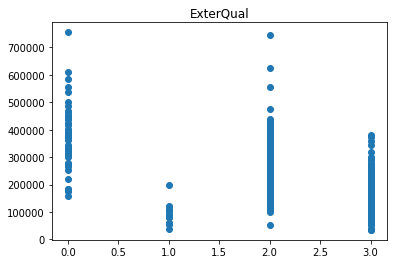

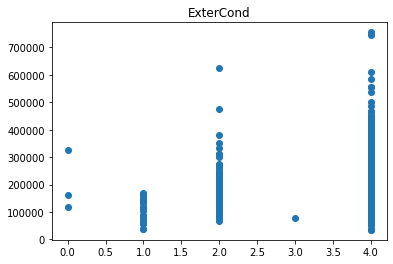

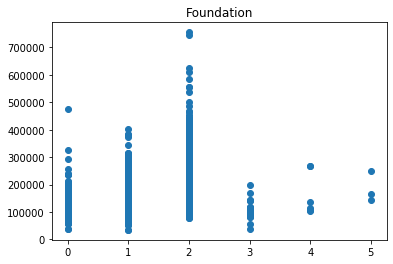

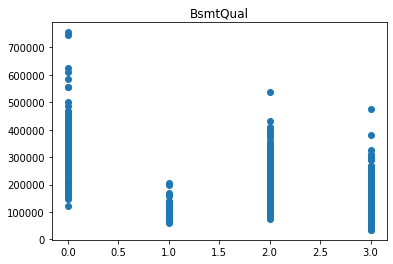

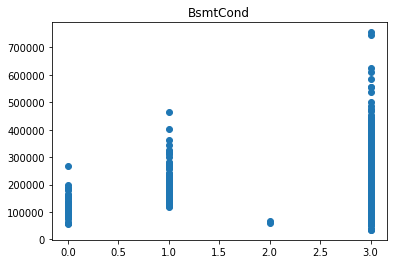

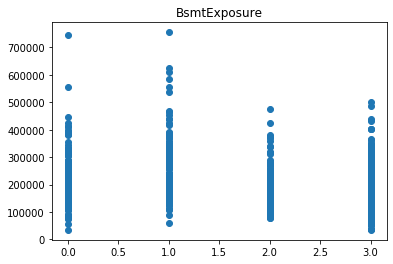

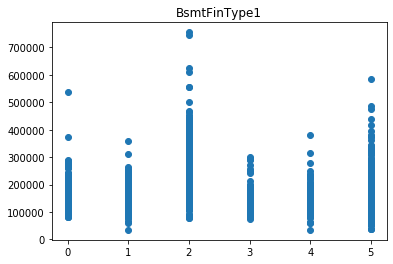

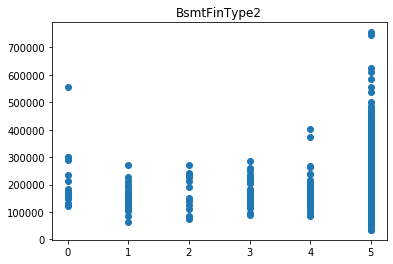

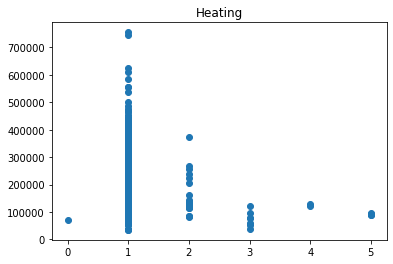

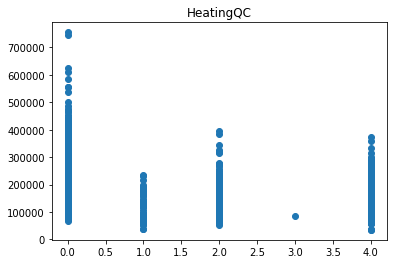

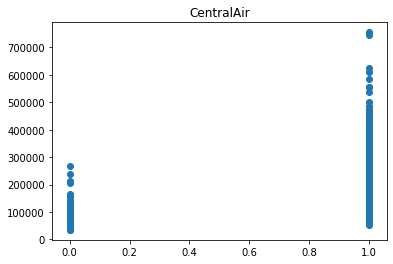

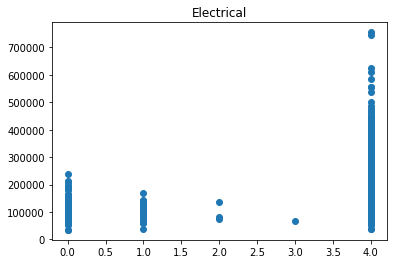

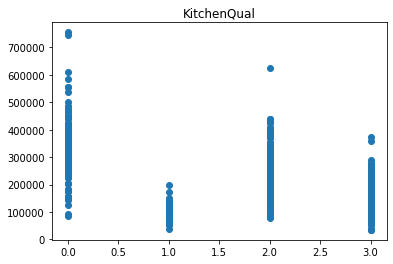

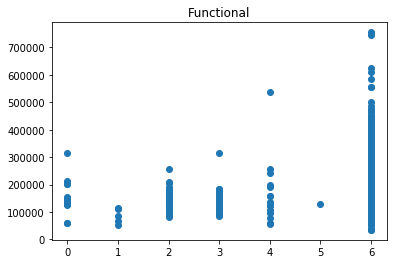

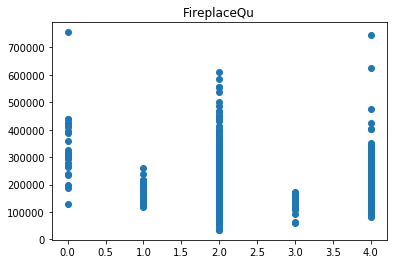

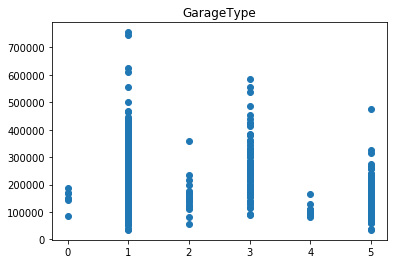

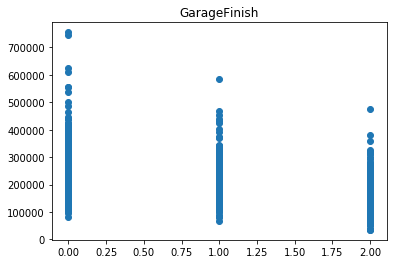

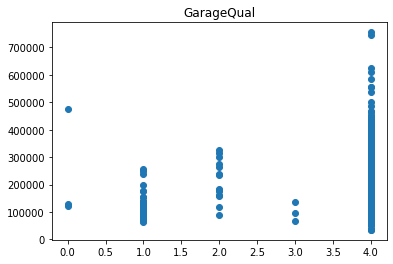

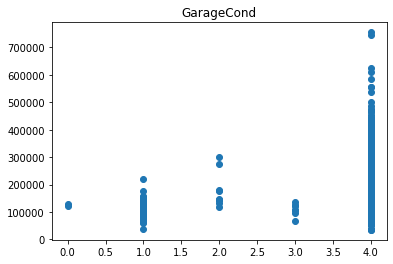

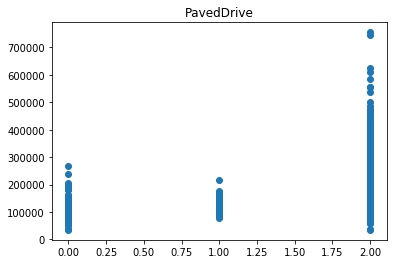

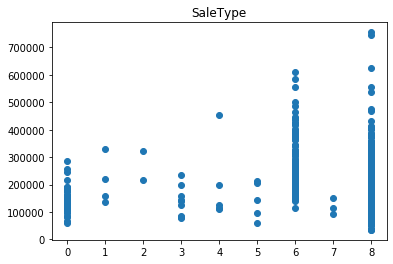

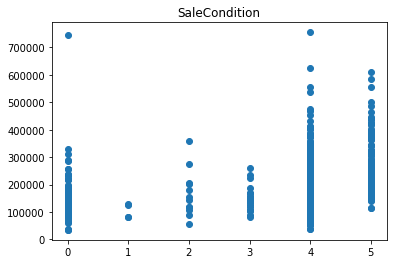

In [18]:
for i in train_X.columns:
    plt.title(i)
    plt.scatter(train_X[i], train_Y)
    plt.show()

In [144]:
import sklearn.metrics

In [45]:
###Linear SVM
svm_reg1 = sklearn.pipeline.Pipeline([
    ("scale", sklearn.preprocessing.StandardScaler()),
    ('linear_svr', sklearn.svm.LinearSVR())
])
#svm_reg.fit(train_X,train_Y)
# scores = sklearn.model_selection.cross_val_score(svm_reg1, train_X, train_Y, scoring = 'neg_mean_absolute_error', cv = 10)
# print(scores)
# print(scores.mean())
param_grid = [{'linear_svr__epsilon': [0,0.5,0.4,0.8,0.9,1.1,1.4]}]
grid_search = sklearn.model_selection.GridSearchCV(svm_reg1, param_grid, cv = 5, scoring = 'neg_mean_absolute_error', return_train_score = True)
grid_search.fit(train_X, train_Y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('linear_svr', LinearSVR())]),
             param_grid=[{'linear_svr__epsilon': [0, 0.5, 0.4, 0.8, 0.9, 1.1,
                                                  1.4]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [46]:
grid_search.best_score_

-179753.19589041098

In [47]:
grid_search.best_params_

{'linear_svr__epsilon': 0}

In [55]:
####Polynomial SVM
svm_reg2 = sklearn.pipeline.Pipeline([
    ("scale", sklearn.preprocessing.StandardScaler()),
    ('linear_svr', sklearn.svm.SVR(kernel = "poly", epsilon = 1.5, coef0 = 1))
])
#svm_reg.fit(train_X,train_Y)
#scores = sklearn.model_selection.cross_val_score(svm_reg2, train_X, train_Y, scoring = 'neg_mean_absolute_error', cv = 10)

param_grid = [{'linear_svr__degree': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
              'linear_svr__coef0': [0, 1, 2, 3]}]
grid_search = sklearn.model_selection.GridSearchCV(svm_reg2, param_grid, cv = 5, scoring = 'neg_mean_absolute_error', return_train_score = True)
grid_search.fit(train_X, train_Y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('linear_svr',
                                        SVR(coef0=1, epsilon=1.5,
                                            kernel='poly'))]),
             param_grid=[{'linear_svr__coef0': [0, 1, 2, 3],
                          'linear_svr__degree': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                 9]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [56]:
print(grid_search.best_score_)
print(grid_search.best_params_)

-16062.849166312764
{'linear_svr__coef0': 3, 'linear_svr__degree': 7}


In [49]:
####SVM with rbf kernel and bagging
svm_reg3 = sklearn.pipeline.Pipeline([
    ("scale", sklearn.preprocessing.StandardScaler()),
    ('linear_svr', sklearn.svm.SVR(kernel = "rbf", epsilon = 0.1, gamma = 0.01))
])
#svm_reg.fit(train_X,train_Y)
scores = sklearn.model_selection.cross_val_score(svm_reg3, train_X, train_Y, scoring = 'neg_mean_absolute_error', cv = 10)
# bag_reg = sklearn.ensemble.BaggingRegressor(
# svm_reg3, bootstrap = True)

# param_grid = [{'n_estimators':[2,3,4],
#               'max_samples':[1.0, 0.9],
#               'max_features': [0.79, 0.8, 0.82],}]

# param_grid = [{
#               'n_estimators':[2,3,4],
#               'max_samples':[1.0, 0.9],
#               'max_features': [0.79, 0.8, 0.82]}]
# grid_search = sklearn.model_selection.GridSearchCV(svm_reg3, param_grid, cv = 5, scoring = 'neg_mean_absolute_error', return_train_score = True,verbose = 1, n_jobs = 3)
# grid_search.fit(train_X, train_Y)
print(scores)
print(scores.mean())

[-50636.17468159 -59774.53517585 -60486.50371729 -58599.67817402
 -65665.14675468 -50216.08040757 -48757.32530277 -50534.85360959
 -55786.38173057 -54960.8509329 ]
-55541.75304868204


In [61]:
#######Decision Tree Regressor

tree_reg = sklearn.tree.DecisionTreeRegressor()
param_grid = [{'max_depth':[5,6,7,8,9]}]
grid_search = sklearn.model_selection.GridSearchCV(tree_reg, param_grid, cv = 5, scoring = 'neg_mean_absolute_error', return_train_score = True)
grid_search.fit(train_X, train_Y)
print('best_score = ' +str(grid_search.best_score_))
print('best_param = ' +str(grid_search.best_params_))

best_score = -25477.936999166748
best_param = {'max_depth': 7}


In [67]:
####### Random Forest


rand_forest = sklearn.ensemble.RandomForestRegressor(n_jobs = -1, verbose = 1)
param_grid = [{'n_estimators':[504, 510, 550, 600],
              'max_leaf_nodes': [None]}]
grid_search = sklearn.model_selection.GridSearchCV(rand_forest, param_grid, cv = 5, scoring = 'neg_mean_absolute_error', return_train_score = True)
grid_search.fit(train_X, train_Y)
print('best_score = ' +str(grid_search.best_score_))
print('best_param = ' +str(grid_search.best_params_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 489 out of 504 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:    2.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 504 out of 504 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 504 out of 504 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBac

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 495 out of 510 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 510 out of 510 | elapsed:    3.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 510 out of 510 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 510 out of 510 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBac

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    3.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | e

best_score = -17428.252900086976
best_param = {'max_leaf_nodes': None, 'n_estimators': 504}


[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:    4.0s finished


In [73]:
for name, score in zip(train_X.columns, rand_forest.feature_importances_):
    print(name, score)

Id 0.0038446862903385496
MSSubClass 0.0012125436188471928
LotFrontage 0.007255789142526333
LotArea 0.01284788544176119
OverallQual 0.5839231433752271
OverallCond 0.004440537651601475
YearBuilt 0.00943838186726021
YearRemodAdd 0.00670718993858779
MasVnrArea 0.00710014545320696
BsmtFinSF1 0.029688467660679438
BsmtFinSF2 0.0006101838016012958
BsmtUnfSF 0.0056349555591799
TotalBsmtSF 0.03647652719791629
1stFlrSF 0.0245724698458682
2ndFlrSF 0.03211323638399668
LowQualFinSF 0.00023803547395447505
GrLivArea 0.10823837681383203
BsmtFullBath 0.0007021964771190486
BsmtHalfBath 0.0008380503908740558
FullBath 0.005146597752686328
HalfBath 0.0008650577505758302
BedroomAbvGr 0.0015001949655823956
KitchenAbvGr 0.0012544112705095178
TotRmsAbvGrd 0.007105995222906801
Fireplaces 0.0034474383416094505
GarageYrBlt 0.004777221653167839
GarageCars 0.01668908501363898
GarageArea 0.015468472770563735
WoodDeckSF 0.004744791013461058
OpenPorchSF 0.004583634664343093
EnclosedPorch 0.000676816637727724
3SsnPorch 

In [19]:
svr_bagging = sklearn.pipeline.Pipeline([
    ('scale', sklearn.preprocessing.StandardScaler()),
    ('svm', sklearn.svm.SVR(kernel = 'poly', coef0 = 3, degree = 7, epsilon = 1.5))
])

bag_reg = sklearn.ensemble.BaggingRegressor(
svr_bagging, bootstrap = True)

param_grid = [{'n_estimators':[2,3,4],
              'max_samples':[1.0, 0.9],
              'max_features': [0.79, 0.8, 0.82],}]

grid_search = sklearn.model_selection.GridSearchCV(bag_reg, param_grid, cv = 5, scoring = 'neg_mean_absolute_error', return_train_score = True, verbose = 1, n_jobs = -1)
grid_search.fit(train_X, train_Y)
print('best_score = ' +str(grid_search.best_score_))
print('best_param = ' +str(grid_search.best_params_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   19.3s finished


best_score = -17117.331174241914
best_param = {'max_features': 0.79, 'max_samples': 1.0, 'n_estimators': 3}


In [10]:
######PART 1 of final model

svm_reg_final = sklearn.pipeline.Pipeline([
    ('scale', sklearn.preprocessing.StandardScaler()),
    ('linear_svr', sklearn.svm.SVR(kernel = 'poly', epsilon = 1.5, coef0 = 3, degree = 7))
])
scores = sklearn.model_selection.cross_val_score(svm_reg_final, train_X, train_Y, scoring = 'neg_mean_absolute_error',  cv = 10)

print(scores.mean())
# svm_reg_final.fit(train_X, train_Y)
# predictions = svm_reg_final.predict(train_X)
# error = sklearn.metrics.mean_absolute_error(train_Y, predictions)
# print('mae = '+str(error))

-16105.101675317102


In [13]:
predictions = sklearn.model_selection.cross_val_predict(svm_reg_final, train_X, train_Y)

In [15]:
error = sklearn.metrics.mean_absolute_error(train_Y, predictions)

In [16]:
print(error)

16062.8491663128


In [30]:
######Part 2 of final model
rand_forest_final = sklearn.ensemble.RandomForestRegressor(n_jobs = -1, verbose = 0, n_estimators = 504)
# param_grid = [{'n_estimators':[504, 510, 550, 600],
#               'max_leaf_nodes': [None]}]
#rand_forest_final.fit(train_X,train_Y)
scores = sklearn.model_selection.cross_val_score(rand_forest_final, train_X, train_Y, scoring = 'neg_mean_squared_error', cv = 10)
print(scores)
print(scores.mean())

[-5.93520122e+08 -6.93804809e+08 -4.67676491e+08 -1.47219157e+09
 -1.11871886e+09 -6.54502845e+08 -5.62462357e+08 -5.66102387e+08
 -1.71122166e+09 -7.60712272e+08]
-860091338.1502098


In [31]:
voting_reg = sklearn.ensemble.VotingRegressor(estimators = [('svm', svm_reg_final), ('rand', rand_forest_final)])
voting_reg.fit(train_X, train_Y)

VotingRegressor(estimators=[('svm',
                             Pipeline(steps=[('scale', StandardScaler()),
                                             ('linear_svr',
                                              SVR(coef0=3, degree=7,
                                                  epsilon=1.5,
                                                  kernel='poly'))])),
                            ('rand',
                             RandomForestRegressor(n_estimators=504,
                                                   n_jobs=-1))])

In [32]:
predictions = voting_reg.predict(train_X)
error = sklearn.metrics.mean_absolute_error(train_Y, predictions)

In [33]:
print(error)

7170.627738512291


In [27]:
predictions_test = voting_reg.predict(test_data)
submition = pd.DataFrame()
submition['Id'] = test_data['Id'].astype('int32')
submition['SalePrice'] = predictions_test
submition.to_csv('D:\python_practise_deeplearning\Kaggle_competition_housing\submition.csv', index = False)

In [29]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,20.0,2.0,80.0,11622.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,8.0,4.0
1,1462.0,20.0,3.0,81.0,14267.0,1.0,0.0,3.0,0.0,0.0,...,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,8.0,4.0
2,1463.0,60.0,3.0,74.0,13830.0,1.0,0.0,3.0,0.0,4.0,...,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,8.0,4.0
3,1464.0,60.0,3.0,78.0,9978.0,1.0,0.0,3.0,0.0,4.0,...,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,8.0,4.0
4,1465.0,120.0,3.0,43.0,5005.0,1.0,0.0,1.0,0.0,4.0,...,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,8.0,4.0


In [37]:
submition.head()

,Id,SalePrice
0,1461,125746.197318
1,1462,166285.944352
2,1463,180777.156614
3,1464,187510.463600
4,1465,193424.215028


In [41]:
submition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int32  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 17.2 KB


# BOOSTING methods Below

In [14]:
gbrt = sklearn.ensemble.GradientBoostingRegressor()
param_grid = [{'max_depth': [4, 7, 9, 5],
               'n_estimators': [490, 500, 504],
               'learning_rate': [0.1]
}]

grid_search = sklearn.model_selection.GridSearchCV(gbrt, param_grid, cv = 5, scoring = 'neg_mean_absolute_error', return_train_score = True, verbose = 1, n_jobs = 4)
grid_search.fit(train_X, train_Y)
print('best_score = ' +str(grid_search.best_score_))
print('best_param = ' +str(grid_search.best_params_))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  4.3min finished


best_score = -16182.653692852531
best_param = {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 504}


In [15]:
gbrt = sklearn.ensemble.GradientBoostingRegressor(max_depth = 4, n_estimators = 500, learning_rate = 0.1)

scores = sklearn.model_selection.cross_val_score(gbrt, train_X, train_Y, scoring = 'neg_mean_absolute_error', cv = 10)
print(scores)
print(scores.mean())

[-14014.76474982 -15701.49969013 -13826.85398802 -18073.69015405
 -16663.86406492 -15010.46776234 -13861.71556297 -14422.22782592
 -16764.35209408 -15845.81739882]
-15418.525329108055


In [21]:
voting_reg = sklearn.ensemble.VotingRegressor(estimators = [('boost', gbrt), ('rand', rand_forest_final)])
voting_reg.fit(train_X, train_Y)
predictions = voting_reg.predict(train_X)
error = sklearn.metrics.mean_absolute_error(train_Y, predictions)
print(error)

4270.918323861537


In [23]:
predictions_test = voting_reg.predict(test_data)
submition = pd.DataFrame()
submition['Id'] = test_data['Id'].astype('int32')
submition['SalePrice'] = predictions_test
submition.to_csv('D:\python_practise_deeplearning\Kaggle_competition_housing\submition1.csv', index = False)

In [22]:

voting_reg_svm_boost = sklearn.ensemble.VotingRegressor(estimators = [('svm', svm_reg_final),('boost', gbrt)])
voting_reg_svm_boost.fit(train_X, train_Y)
predictions = voting_reg_svm_boost.predict(train_X)
error = sklearn.metrics.mean_absolute_error(train_Y, predictions)
print(error)

5454.764291812416


In [24]:
predictions_test = voting_reg_svm_boost.predict(test_data)
submition = pd.DataFrame()
submition['Id'] = test_data['Id'].astype('int32')
submition['SalePrice'] = predictions_test
submition.to_csv('D:\python_practise_deeplearning\Kaggle_competition_housing\submition2.csv', index = False)

In [25]:
voting_reg_svm_boost_rf = sklearn.ensemble.VotingRegressor(estimators = [('svm', svm_reg_final),('boost', gbrt), ('rand', rand_forest_final)])
voting_reg_svm_boost_rf.fit(train_X, train_Y)
predictions = voting_reg_svm_boost_rf.predict(train_X)
error = sklearn.metrics.mean_absolute_error(train_Y, predictions)
print(error)

predictions_test = voting_reg_svm_boost_rf.predict(test_data)
submition = pd.DataFrame()
submition['Id'] = test_data['Id'].astype('int32')
submition['SalePrice'] = predictions_test
submition.to_csv('D:\python_practise_deeplearning\Kaggle_competition_housing\submition2.csv', index = False)

5508.973437686727


In [26]:
import xgboost

In [44]:
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(train_X, train_Y)
pred = xgb_reg.predict(train_X)
error = sklearn.metrics.mean_absolute_error(train_Y, pred)
print(error)
# scores = sklearn.model_selection.cross_val_score(xgb_reg, train_X, train_Y, scoring = 'neg_mean_absolute_error',  cv = 10)
# print(scores.mean())
predictions_test = xgb_reg.predict(test_data)
submition = pd.DataFrame()
submition['Id'] = test_data['Id'].astype('int32')
submition['SalePrice'] = predictions_test
submition.to_csv('D:\python_practise_deeplearning\Kaggle_competition_housing\submition_xgb.csv', index = False)

1179.5953392551369


In [40]:
voting_reg_svm_boost_rf = sklearn.ensemble.VotingRegressor(estimators = [('boost', gbrt), ('xgboost', xgb_reg),('svm', svm_reg_final), ('rand', rand_forest_final)])
voting_reg_svm_boost_rf.fit(train_X, train_Y)
predictions = voting_reg_svm_boost_rf.predict(train_X)
error = sklearn.metrics.mean_absolute_error(train_Y, predictions)
print(error)

4335.705490902437


In [41]:
predictions_test = voting_reg_svm_boost_rf.predict(test_data)
submition = pd.DataFrame()
submition['Id'] = test_data['Id'].astype('int32')
submition['SalePrice'] = predictions_test
submition.to_csv('D:\python_practise_deeplearning\Kaggle_competition_housing\submition_all.csv', index = False)